# Intro to Neural Networks with Hugo

This is a colab to introduce the fundamentals of Neural Networks and how to make one. We're going to make one from scratch (using 0 libraries) that will learn to add numbers.

## Learning

Before we start let's talk about what learning is. There's two types in Machine Learning. Supervised and unsupervised

- unsupervised learning means we have a dataset and we want to get information from it unseen. Basically design an algorithm to learn without doing any training. An examples of an unsupervised model is K-means clustering.
- supervised learning means we user prior knowledge to tune the model to fit the data. 

Neural network are **supervised learning** models. *This is not strictly true. But let's keep it simple for now*

There's also semi-supervised learning which is giving a small amount of labelled data, and a lot of unlabelled data. But fundamentally it's just an optimisation technique.

### Types of Results

There are broadly two types of ML task

- Regression - tries to predict the next value in a continuous sequence
- Classification - tries to classify inputs into a discreet value

That's it.

## What is a neural network?

It's just a function

One that we can optimise to get to the result we want.

## Neural Network Architecture

The fundamental building block is a neuron, which takes an input, contains a bias and produces an output, with a weight being applied to the input and output. Inside the neuron we have an activation function which we will discuss later.

We then create layers of these neurons and pass information through the network to see the output. We can then use something called backpropagation to adjust the network to what we want.

The neural network we're going to build looks like this:

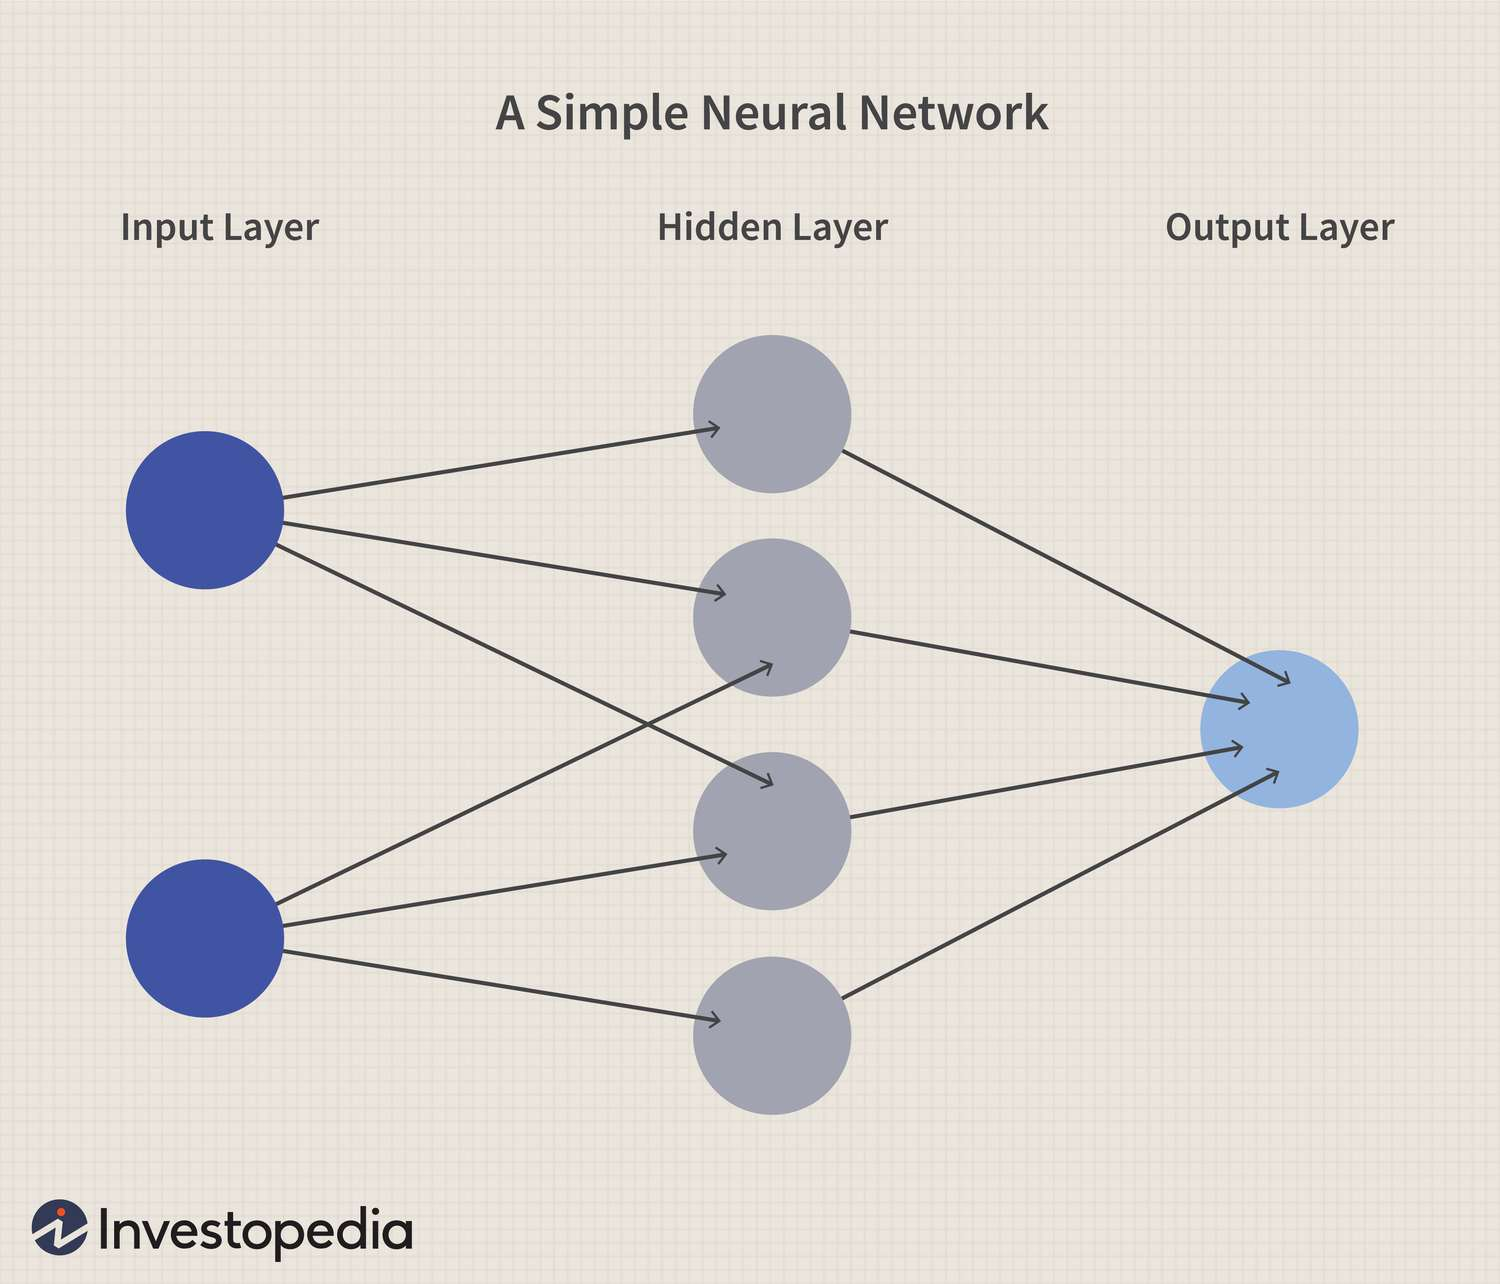


Once we've defined it we're going to optimise it using back propagation until we get a good result.


## It's just function

A neural network is just a function. Our function is doing addition so this is what it looks like:

$$
y = \sum_{i=1}^{n} x_i
$$

While this might seem roundabout this is just the generic description for addition in Maths. 

If we were to plot this function it would look like this:


In [ ]:
# run this to avoid issues with dependencies
%pip install torch numpy matplotlib

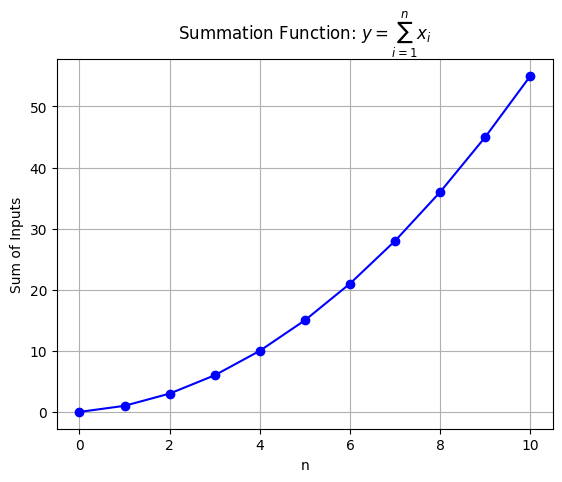

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def summation(n):
    return sum(range(1, n+1))

n_values = np.arange(0, 11)
summation_values = [summation(n) for n in n_values]


plt.plot(n_values, summation_values, marker='o', linestyle='-', color='b')


plt.xlabel('n')
plt.ylabel('Sum of Inputs')
plt.title('Summation Function: $y = \\sum_{i=1}^{n} x_i$')


plt.grid(True)
plt.show()


This is important since when we optimise the network we're effectively going to find the gradient of this function and apply it to the network.

The calculus is literally just derivatives. Nothing else so don't panic.



## Neuron

So let's start with the fundamental building block which is the neuron.

A neuron looks like this:


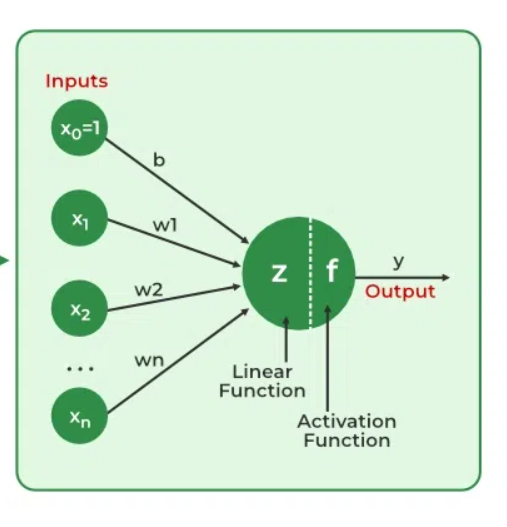

Basically it has three parts

- an input
- a function (also known as an activation function)
- an ouput


By linking this together we can do some amazing things



## Brief Detour

Neural Networks work on Linear Algebra. This way you can get dimensions into the network, i.e a 2-d image or 3-d video with a time axis.

Not you can forget I said that unless you love linear algebra, in which case read this: https://personal.utdallas.edu/~herve/Abdi-lann-01.pdf

In [3]:
# The Neuron class

class Neuron:
    def __init__(self, weights):
        # we assign some weights. 
        # The weights are random numbers intially that basically just set the weight we should give to each
        # A higher weight will mean the network pulls more in one direction
        self.weights = weights

    def activate(self, inputs):
        # Currently we just do nothing and return the output
        return output


Now we need to determine an activation function.

There's a plethora of activation functions out there but since this is so simple and we're just doing addition we'll just add a simple activation function, which will be the weighted sum of the inputs. 

That means it's going to just add them together while applying the weights.

This is a **linear activation** since all we're doing is moving the output up in linear fashion just as the graph above does

Here's the maths:
The output \( y \) of a neuron can be represented as a weighted sum of its inputs:

$$
y = \sum_{i=1}^{n} w_i x_i
$$

Where:
- \( y \) is the output of the neuron.
- \( w_i \) are the weights corresponding to each input.
- \( x_i \) are the inputs.
- \( n \) is the number of inputs.


### Linear and Non-linear activations

What even is an activation?

Think of the biological neural network. A neuron *activates* on certain stimuli. As in it fires. This is much the same. Mathematically what we mean by firing it the number is high or low. Either results pulls the network a certain way. 

We're using a linear activation so we just pass it through. It's useful for a simple network as it reduces complexity.

A non-linear activation will scale the output between 0 and 1 (usually) and add complexity which allows the network to learn more complex relationships. We'll look at one later. They are also more useful in the hidden layers.

#### Note

This is not really what a Neuron looks like in a modern neural network, because usually we'll have something like a perceptron (which would be a neuron plus a hard threshold) and a more modern neuron which will use non-linear activation.

Non-linear activation is essential because it allows us to teach the network about non-linear relationships.

1+1 = 2 is a linear relationship. It's always going to be true.

The cat jumped over the fox is non-linear because the cat could jump over many things and we'd need to learn what it could jump over.

Non-linear activation functions give the network a chance to learn those relationships.

In [5]:
# The Neuron class
import random

class Neuron:
    def __init__(self, num_inputs):
        # let's randomly assign the weights
        # random weights are essential, withouth them our network won't learn.
        # each input has a weight
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_inputs)]
    def activate(self, inputs):
        # weighted sum    
        output = sum(w * i for w, i in zip(self.weights, inputs))
        return output

Now we're going to add a bias.

The bias is basically an indepent input inside the network that adjust the output independently of the inputs (weights). It basically signals how much we should pay attention to the output of a specific neuron. Both weights and biases are learnable parameters (i.e. their value will change as we tune the network).

See it as shaking the tree so it doesn't get stuck on one input.

In [6]:
# The Neuron class with bias
class Neuron:
    def __init__(self, num_inputs):
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_inputs)]
        self.bias = random.uniform(-0.5, 0.5)

    def activate(self, inputs):
        # Calculate the output as weighted sum plus bias (shaking that tree)
        output = sum(w * i for w, i in zip(self.weights, inputs)) + self.bias
        return output

Now we have a single neuron that does something let's define a layer

A layer is just a list of neurons that are connected to the next layer

So in this case we just have a linear layer (it's flat)

The layer class looks like below

In [7]:
class LinearLayer:
    def __init__(self, num_inputs, num_outputs):
        # define a number of inputs and a number of outputs
        self.neurons = [Neuron(num_inputs) for _ in range(num_outputs)]

    def forward(self, inputs):
        # Forward pass: calculate outputs for each neuron
        return [neuron.activate(inputs) for neuron in self.neurons]

    def backward(self, true_outputs):
        # Backward pass: need to implement this
        return gradients

In [ ]:
# 2 inputs, 1 output - addition
ll = LinearLayer(2, 1)
inputs = [1,2]
# we'll use this later
expected_output = 3
ll.forward(inputs)

So we can see that we're way off and it's not very good. It thinks 1+2 is -0.5

So what we need to do is adjust the weights so that they pull more in the correct direction. 

We need to **train** the network. 

We can do this by passing values through and working out how far off the correct result we are, adjusting our weights to get us a bit closer and then updating the weights and doing the forward pass again. This is called **backprogagation**

## Backpropagation

Backpropagation is key to how modern neural networks work.

Basically we need to work out how to (and by how much) adjust each weight and biase so it pulls in the right direction. So in our current network, the network is a bit low so we need to pull it towards 1.

To do this we calculate the gradient that the graph needs to move in order for us to reach 1.

This process is also known as calculating the **derivative** of each neuron in regards to the output.


### Calculus

As you know how much things move is the domain of calculus. 

If you really want the maths it's this:

**Derivative of the Output with Respect to the Weights:**
$$
\frac{\partial y}{\partial w_i} = x_i
$$

**Derivative of the Output with Respect to the Inputs:**
$$
\frac{\partial y}{\partial x_i} = w_i
$$

**Derivative of the Output with Respect to the Bias:**
$$
\frac{\partial y}{\partial b} = 1
$$

That's it there will be no more calculus since you don't need to know it to understand. All you need to know is that we're going to do this calcuation in the backward pass of our network.

Below add a gradient function to do do this

In [9]:
class Neuron:
    def __init__(self, num_inputs):
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_inputs)]
        self.bias = random.uniform(-0.5, 0.5)

    def activate(self, inputs):
        # Forward pass
        self.inputs = inputs  # Save inputs for gradient calculation
        self.output = sum(w * i for w, i in zip(self.weights, inputs)) + self.bias

        return self.output

    def gradients(self, dL_dy):
        # Gradient with respect to weights
        dL_dw = [dL_dy * x for x in self.inputs]

        # Gradient with respect to bias
        dL_db = dL_dy  # Gradient w.r.t bias is simply dL_dy

        # Gradient with respect to inputs (to pass back into the network)
        dL_dx = [dL_dy * w for w in self.weights]

        return dL_dw, dL_db, dL_dx
    
    def update_weights(self, gradients):
        dL_dw, dL_db, _ = gradients

        # Update each weight by subtracting the gradient from the weight
        self.weights = [w - gw for w, gw in zip(self.weights, dL_dw)]
    
        # Update bias similarly
        self.bias -= dL_db

In [ ]:

# now let's calculate a gradient
# two inputs one output
a = Neuron(1)
b = Neuron(2)


# forward pass on the neuron a
output_a = a.activate([1,6])

# forward pass on neuron b
output_b = b.activate([output_a, 0])

print(f"{output_a}=")
print(f"Output: {output_b}=")

# how far away are we?
target = 7
distance = output_b - target

# now we work out the gradients for b (assuming our target result is 2)
# we about the input gradient
grad_b_dw, grad_b_db, grad_b_dX = b.gradients(distance)
print(f"Input Gradient: {grad_b_dX}")
print(f"Weights Gradient: {grad_b_dw}")

# we can then use this to adjust the weights to get closer to a result we want

Now let's fix the layer

In [12]:
class LinearLayer:
    def __init__(self, num_inputs, num_outputs):
        self.neurons = [Neuron(num_inputs) for _ in range(num_outputs)]

    def forward(self, inputs):
        self.outputs = [neuron.activate(inputs) for neuron in self.neurons]
        return self.outputs

    def gradients(self, loss_grad):
        # calculate all the gradients
        gradients = [neuron.gradients(loss_grad) for neuron in self.neurons]
        return gradients

    def backward(self):
        pass

    def update_weights(self, gradients):
        # apply all the gradients to the neurons in the network
        for neuron, grad in zip(self.neurons, gradients):
            neuron.update_weights(grad, learning_rate)


In [ ]:
ll = LinearLayer(2, 1)
ll.forward([1,2])
target = 3
ll.gradients(target)

Next up we're going to implement the backwards path so that all the weights get updated with respect to the target function and we start to get a better results.

From now on let's call the target the loss (i.e the error rate in our network). We will discuss this more shortly.

In [ ]:
class LinearLayer:
    def __init__(self, num_inputs, num_outputs):
        self.neurons = [Neuron(num_inputs) for _ in range(num_outputs)]

    def forward(self, inputs):
        # Forward pass through all neurons in the layer
        self.inputs = inputs  # Save inputs for use in the backward pass
        self.outputs = [neuron.activate(inputs) for neuron in self.neurons]
        return self.outputs

    def backward(self, target):
        # Assume target is the desired output
        # Here we'll calculate the gradient for the first (and only) output
        loss_grad = self.outputs[0] - target  # Gradient of the output with respect to the target

         # Calculate gradients
        gradients = [neuron.gradients(loss_grad) for neuron in self.neurons]

        self.update_weights(gradients)

        # Compute gradient with respect to inputs for the next layer (if any)
        input_gradients = [0] * len(self.inputs)
        
        for i, neuron in enumerate(self.neurons):
            for j in range(len(neuron.weights)):
                input_gradients[j] += gradients[i][2][j]  # gradients[i][2] gives dL/dx for each neuron

        return input_gradients

    def update_weights(self, gradients):
        # Update weights and biases for each neuron in the layer
        for neuron, grad in zip(self.neurons, gradients):
            neuron.update_weights(grad)

In [ ]:
ll = LinearLayer(2, 1)

# Forward pass through the layer
outputs = ll.forward([1, 2])
print(f"Output: {outputs}=")


target = 3

input_gradients = ll.backward(target)
print(f"Input gradients: {input_gradients}=")

# Print the updates
for i, neuron in enumerate(ll.neurons):
    print(f"Updated weights of neuron {i}: {neuron.weights}")

ll.forward([1,2])

# so now we have a mechanism to calculate all the gradients in our network

## What is the Loss Function

Distance above is not the technical term. The technical term is the loss function. And what we really want is not how far away we are from the target but the total error in the network so we can adjust accordingly.

So let's go back and put the network together and then write a loss function to calculate the error.

The backward pass for the Layer is now implemented, but we need to get a better loss function to correct the errors.

The simplest loss function to use is **mean-squared error**, which gives us an average of the prediction errors. This is better since it gives us a better view of the error across the whole network.

It's implemented below

In [28]:
class LinearLayer:
    def __init__(self, num_inputs, num_outputs):
        self.neurons = [Neuron(num_inputs) for _ in range(num_outputs)]

    def forward(self, inputs):
        self.inputs = inputs
        self.outputs = [neuron.activate(inputs) for neuron in self.neurons]
        return self.outputs

    def backward(self, target):
        # Calculate loss gradient for Mean Squared Error
        loss_grad = 2 * (self.outputs[0] - target)  # dL/dy = 2 * (y - target)
        gradients = [neuron.gradients(loss_grad) for neuron in self.neurons]
        self.update_weights(gradients)

        input_gradients = [0] * len(self.inputs)
        for i, neuron in enumerate(self.neurons):
            for j in range(len(neuron.weights)):
                input_gradients[j] += gradients[i][2][j]

        return input_gradients

    def update_weights(self, gradients):
        for neuron, grad in zip(self.neurons, gradients):
            neuron.update_weights(grad)

In [ ]:
# let's go again with a backwards pass

ll = LinearLayer(2, 1)

# Forward pass through the layer
outputs = ll.forward([1, 2])
print(f"Outputs: {outputs}=")


target = 3

input_gradients = ll.backward(target)
print(f"Input gradients: {input_gradients}=")

for i, neuron in enumerate(ll.neurons):
    print(f"Updated weights of neuron {i}: {neuron.weights}")

ll.forward([1,2])

# Magic

As you can see it's terrible. It looks like it's even further off. This is ultimately because our network is still just two inputs and one output and really we need to improve that.

However, now what we're going to do is train it to try and get a better result.

An important thing to understand though is that this is all there is to it. This is all a neural network is.

## Deep Learning

Actually I lied we're going to make it look like the network above and add a hidden layer

Our network is very stupid currently, we can make it better by using deep learning. Deep learning is basically just multiple layers stacked one on top of the other, with the final layer having a single output

So let's make a deep neural network, check the results and then we'll train it

In [ ]:
input_layer = LinearLayer(2, 4)
output_layer = LinearLayer(4, 1)

inputs = [1, 2]
target = 3

hidden_outputs = input_layer.forward(inputs)
final_output = output_layer.forward(hidden_outputs)

output_gradients = output_layer.backward(target)
input_gradients = input_layer.backward(output_gradients[0])

output_layer.forward([1,2])

If you run the above several times what you'll see is that our loss (the output) is going up and down, basically this is the network learning. If you do it enough it'll eventually converge to get a better result. 

And if it doesn't we can just add more layers or try fancier things.

### Torch

Before we move on, let's stop making things ourselves and use a library.

PyTorch is the de facto library for this so let's very quickly make our network in PyTorch and run it and talk about some of the concepts.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(2, 8)
        self.hidden2 = nn.Linear(8, 8)
        self.output = nn.Linear(8, 1) 

    def forward(self, x):
        x = self.hidden(x)
        x1 = torch.relu(self.hidden2(x))
        x = self.output(x1)
        return x



model = SimpleNN()

criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

training_data = [
    (torch.tensor([1.0, 2.0]), torch.tensor([3.0])),
    (torch.tensor([2.0, 3.0]), torch.tensor([5.0])),
    (torch.tensor([3.0, 4.0]), torch.tensor([7.0])),
    (torch.tensor([4.0, 5.0]), torch.tensor([9.0])),
]

# Training loop
epochs = 1000
for epoch in range(epochs):
    for inputs, target in training_data:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(inputs)
        
        # Compute the loss
        loss = criterion(output, target)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

# Testing the trained network
with torch.no_grad():  # No need to track gradients during testing
    for inputs, target in training_data:
        predicted_output = model(inputs)
        print(f"Input: {inputs.numpy()}, Predicted Output: {predicted_output.numpy()}, Target: {target.numpy()}")


## Optmisers

The astute will have noticed that I've added something called **optim.SGD**, along with some arguments. This is **Stochastic Gradient Descent**. 

The optimizer basically takes the output of the loss function and works out how much each of our parameters (weights and biases) need to be tweaked to get us close to that result. It effectively automates the gradient descent that we did manually. 

Stochastic basically means we look at a small sample of the gradients that need to be updated and update those. Unlike above when we updated all the gradients.

In [ ]:
model(torch.tensor([10.0,1.0]))

## More Stuff

There's few new concepts here but the fundamentals are the same.

 - we're using a different activation function ReLu which basically scales values between 0 and 1 in a fancy way. It results in better outputs as you can see because it's non-linear so it enables the network to learn relationships differently. 
 - we've used an optimiser. This is basically a function that determines the best way to adjust the weights in each forward and backwards pass. Our network is tiny so it's uselee but if you had a billion parameters it's going to be much more helpful.
 - a tensor is just a vector of numbers, you can see it as a single input.

### Activation Functions

We're using a simple weighted sum but there are many activation functions that do different things and get different results

Such as:
- binary step
- linear activation (what we're using)
- logistic
- tanh

The list goes on. Each of these then needs a derivative function to update the weights in the neuron

### Learning Rate

This is the rate at which we adjust things in the optimiser, that is how much should we tweak the weights and biases each time we do a forward and backward pass?


### Loss Functions

Different loss functions do different things. You'd use a different loss function for a classification problem for example. Again, you don't really need to know the ins and outs of the loss functions



## Different Network Architectures

What we've built is a simple linear network but there are many different types of neural network architecture. Let's have a quick look at a few of them.

### Recurrent Neural Networks

These are networks that try to have *memory* by having connections to neurons in different layers.

Here's a sample architecture:

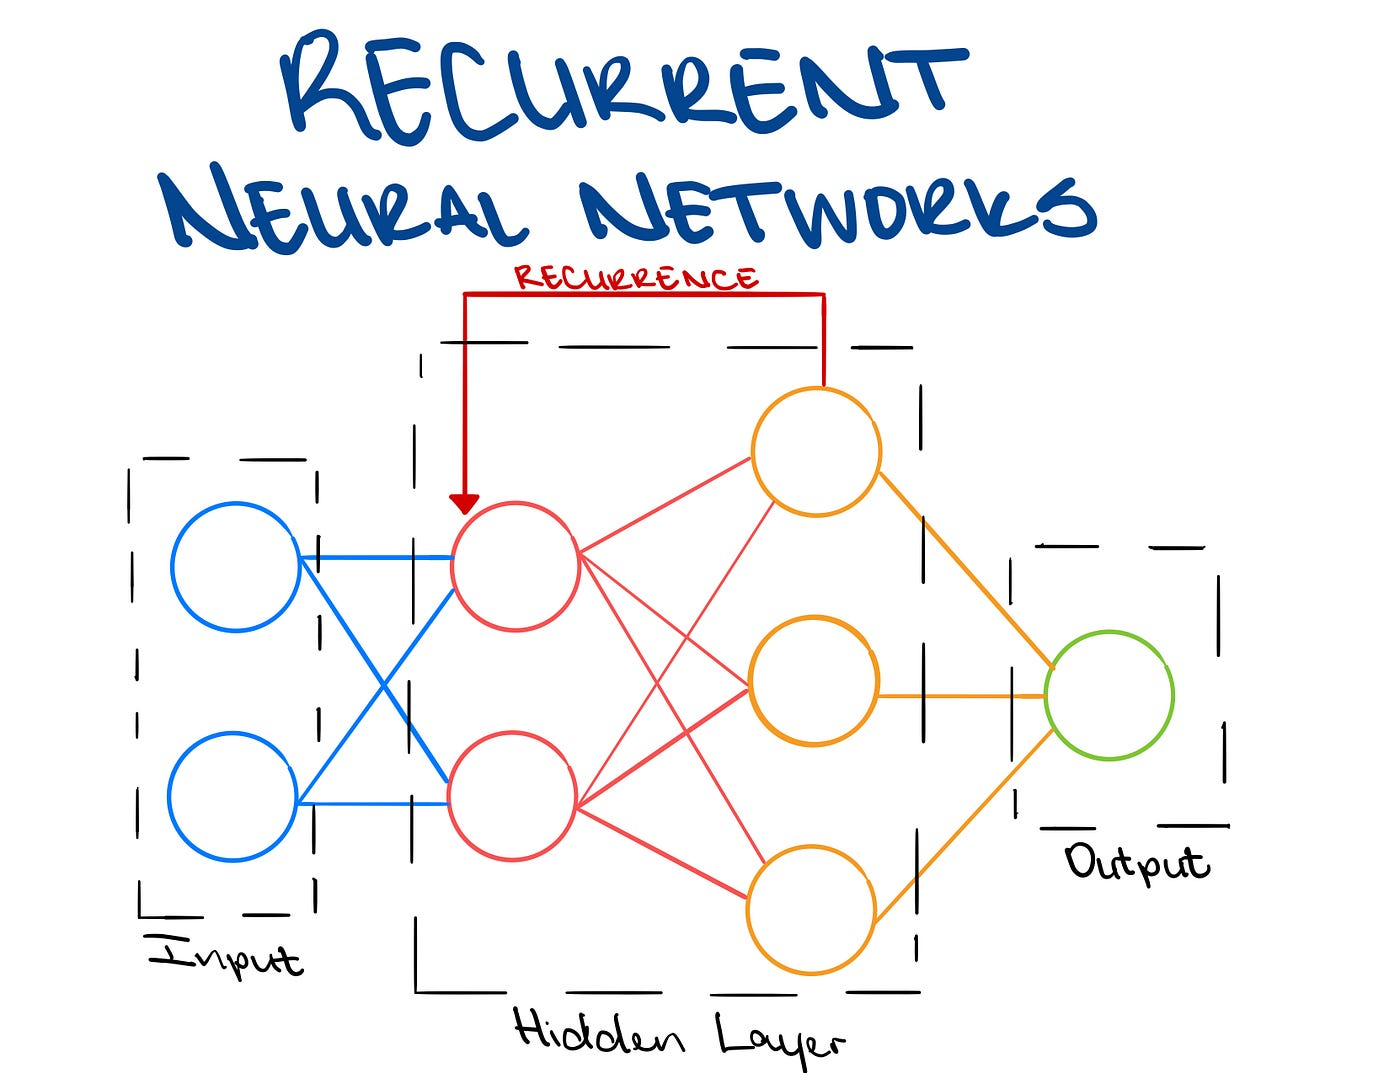

Basically the nodes go back to each other

### LSTM

Long short term memory

These are networks that encode memory into the neuron to try and have different types of memory and learn important patterns in a sequence. 

This is what a LSTM cell looks like:
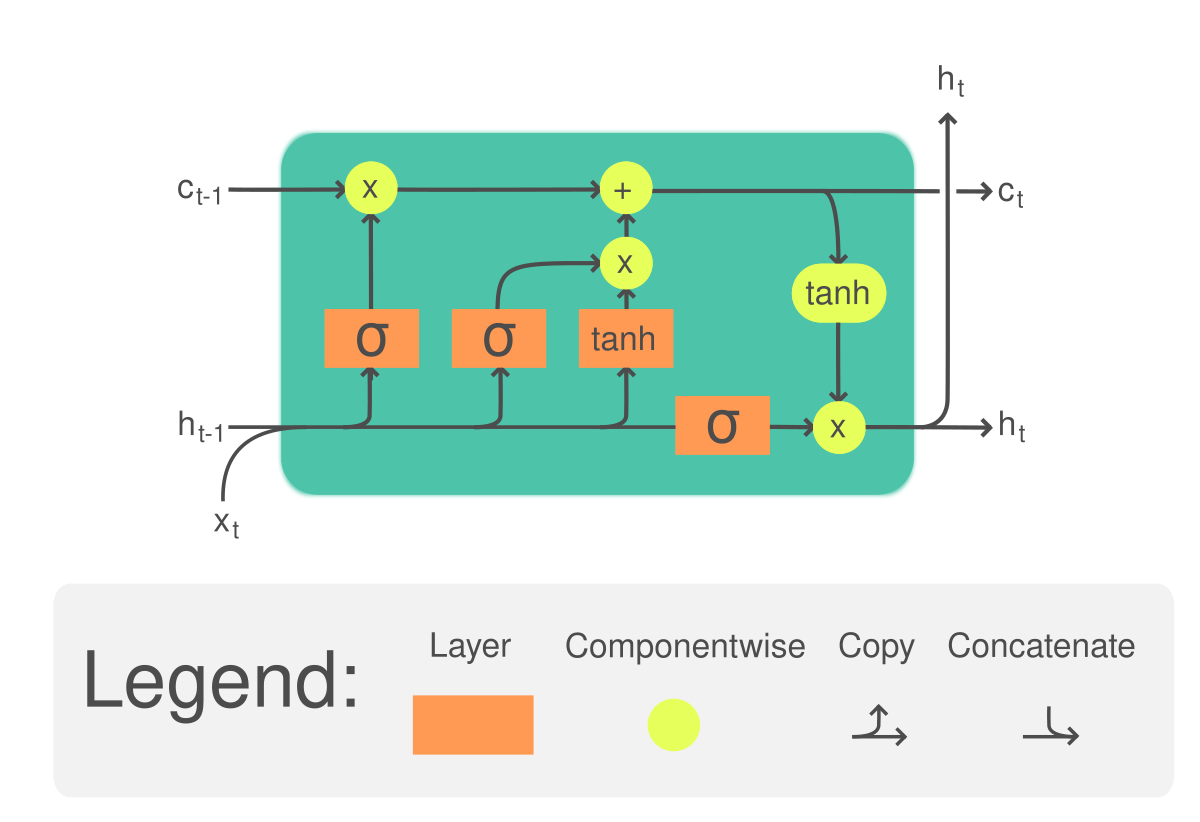

It's basically to try and solver the vanishing gradient problem whereby learning stops in a recurrent network (or slows considerably)

### Transformers

These are what all the LLMs are made of. They are fairly complex to grasp (easier than LSTM) but fundamentally they encode specific characters to pay *attention* to so that the network doesn't waste time trying to learn everything.

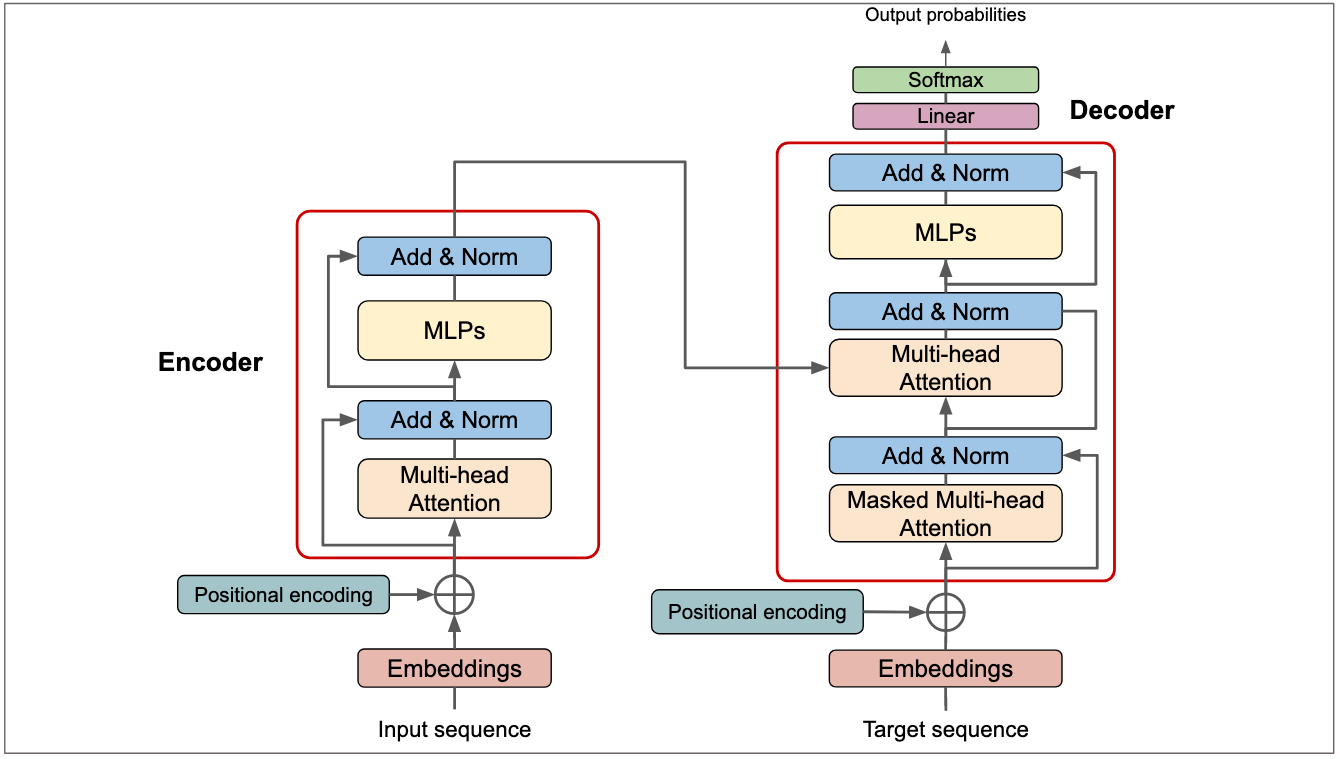

There are some very good videos out there that explain how all of these different architectures work.

## Modelling Language

So we've seen how we can get outputs for numbers so now the question is how can we model language to match to these numbers so we can ultimately make GPT/Llama/Claude

It's actually very simple.

Imagine we have a model that predicts the next character in a sequence of letters.

We could model it like so:

{ a...z } = [0...23] 

The vector of numbers 0...23 can then be used as our output so we'd have 24 possible outputs to the network. We'd find the highest one (softmax) and then use the index to get our alphabetical character.

Obviously modelling the inputs is a bit more complex because we need to preferably put in multiple inputs i.e in the sentence *the fox jumps over the lazy dog* we need to model **th** as an input to get **e** as an output but this can all be done with tensors.

Let's do a very quick example with PyTorch


In [ ]:
names = open('names.txt', 'r').read().splitlines()
names[:10]

# create bigrams
b = {}
for w in names:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

# look at them sorted
sorted(b.items(), key = lambda kv: -kv[1])

In [51]:
import torch
# create a 27 x 27 matrix to hold our bigrams
N = torch.zeros((27, 27), dtype=torch.int32)

In [52]:
# create our dictionary to assign characters to integers
chars = sorted(list(set(''.join(names))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [53]:
# encode the bigrams into the tensor

for w in names:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

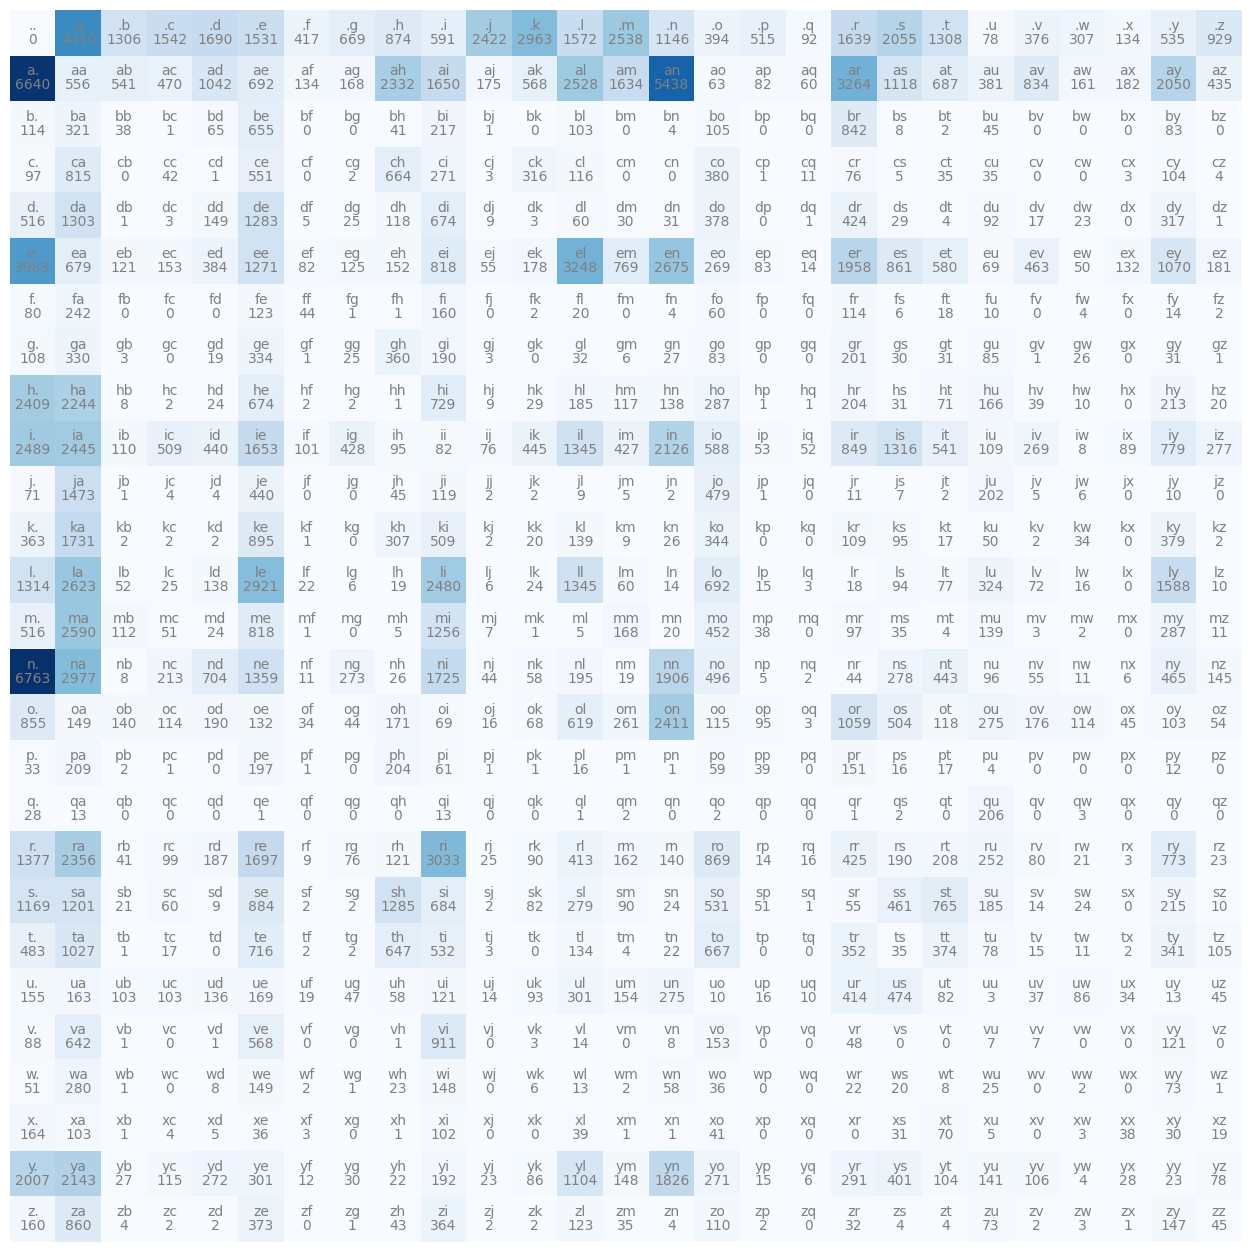

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');


What you can see now is the frequency with with the bigrams occur. So effectively it gives us likelihoods for each pair of characters in the data set occurring

This is as far as I'm going to take the language modelling here but basically you can see that by creating encodings we can then feed these into a network along with expected results and then train this network so we can get better results.

If you want to take it further, have a look at Andrej Karpathy's Makemore series to understand how we can train a network to get this to work.

## Beyond Bigrams

Bigrams are not really very useful so the question is how to encode more words that a network can the learn.

Well to do that we have to tokenize text into arbitrary float values. The standard way to do this so to desgin another neural network that learns patterns in text and use these patterns to generate token encodings.

These encodings can then be used to feed data into a neural network.

## Conclusion

Hopefully you can see that there's no magic involved in any of this and it's actually all very simple. It, of course, gets much more complex and the truly interesting things happen when the networks are trained on vast amounts of data with billions of parameters. Then they exhibit emergent behaviour

### Further Reading

All of Andrej Karpathy's videos are very good: https://www.youtube.com/andrejkarpathy. Particularly the ones about backpropagration and language modelling